# JOB RECOMMENDATION BASED ON RIASEC PERSONALITY

## 1. INTRODUCTION

In this program we will build job recommendation engine based on RIASEC personality.
RIASEC itself stands for Realistic - Investigative - Artistic - Social - Enterprising - Conventional.
RIASEC Personality Test is commonly used to understand someone's skill and career interest.

**DATASET**<br>
We will use several datasets:
1. Taken from <https://www.onetonline.org/explore/interests/>, we can get 6 separate datasets for each RIASEC personality, and related job options matched to personality
2. Taken from <https://www.onetonline.org/find/family?f=0&g=Go>, we can get occupation dataset for all job listed in the website.

**DATA ANALYSIS**
* Beside general overview, we will check the top-5 job family for each personality, to get understanding of each personality characteristic;
* And we will check how each personality is related one to another

**MODELLING APPROACH**
* As we will receive input from user as text, first we will do Text Analysis to get the keywords that match with the dataset
* For recommendation engine, we will use 3 types of modelling and all are from scikit.learn library: 
  1. Text Extraction: CountVectorizer 
  2. Text Extraction: TfidfVectorizer
  3. K-Nearest Neighbor
* To check similarity between text, we use cosine similarity metric

**EXPECTED PROGRAM WORKFLOW**
* User will be able to input the keywords
* Program will get the anchor row, or the first row occurence that match keywords the most
* Program will recommend top ten suggestion similar to the input result (1 anchor row + 9 similar to anchor)

## 2. DATASET PREPARATION

In [1]:
### Import Libraries
import numpy as np
import pandas as pd

### 2.A. DATASET OVERVIEW

In [2]:
### Create function to read file from google drive link
def read_link (link):
    return 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]

In [3]:
### Take a look of one personality table to understand the data
riasec_df = pd.read_csv(read_link('https://drive.google.com/file/d/1Yw8Q-okC156xESWz9ZdYJY8kOZpl3SjR/view?usp=sharing'))
riasec_df

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Interest Area,Second Interest Area,Third Interest Area,Shown in Fewer Occupations
0,45-2091.00,Agricultural Equipment Operators,1,Realistic,NaN,NaN,Yes
1,47-2051.00,Cement Masons and Concrete Finishers,1,Realistic,Enterprising,NaN,Yes
2,53-7011.00,Conveyor Operators and Tenders,1,Realistic,Conventional,NaN,NaN
3,35-2011.00,"Cooks, Fast Food",1,Realistic,Conventional,NaN,Yes
4,51-9031.00,"Cutters and Trimmers, Hand",1,Realistic,Conventional,NaN,NaN
...,...,...,...,...,...,...,...
366,29-2091.00,Orthotists and Prosthetists,5,Social,Realistic,Investigative,Yes
367,19-2012.00,Physicists,5,Investigative,Realistic,NaN,Yes
368,19-2099.01,Remote Sensing Scientists and Technologists,5,Realistic,Investigative,NaN,Yes
369,19-1013.00,Soil and Plant Scientists,5,Investigative,Realistic,NaN,Yes


**REALISTIC PERSONALITY DATASET OVERVIEW**<br>
This data contains all job title that has Realistic as their first, second, or third interest area. With more detail explanation as below:
1. `O*NET-SOC Code` is job code
2. `O*NET-SOC Title` is occupation title
3. `Job Zone` A Job Zone is a group of occupations that are similar in: how much education, related experience or on-the-job training people need to do the work. Where 1 means the occupation need little to no preparation, while 5 means the occupation need extensive preparation. 
4. `First Interest Area` is the most dominant personality needed for the job 
5. `Second Interest Area` is the second dominant personality needed for the job
6. `Third Interest Area` is the third dominant personality needed for the job
7. `Shown in Fewer Occupations` is on-the-site menu. Where if `Yes`, then the row will be shown in `Show Less` preference on the website.

After check the Realistic dataset, we will combine with another personality datasets. All column names are same.

In [4]:
### Combine Realistic dataset with other 5 personalities.
riasec_df = pd.concat([riasec_df, # Realistic
                      pd.read_csv(read_link('https://drive.google.com/file/d/1fTj0tFJtQ4htBEa1dpLVjhWe93PYOHA1/view?usp=sharing')), # Investigative
                      pd.read_csv(read_link('https://drive.google.com/file/d/1CR2IHnrhKC-7EtUjP5s-x8nkie6zSfiZ/view?usp=sharing')), # Artistic
                      pd.read_csv(read_link('https://drive.google.com/file/d/1Me5geVIjvEtMPldfzMOwBWavJDjy-e0c/view?usp=sharing')), # Social
                      pd.read_csv(read_link('https://drive.google.com/file/d/1WOTNJ7htmu5jR3gvaCPNLKg0ca1p3jaR/view?usp=sharing')), # Enterprising
                      pd.read_csv(read_link('https://drive.google.com/file/d/1crJJh-svX5jGfVgs3oZlciEWJas_YYPY/view?usp=sharing')) # Conventional
                      ])
riasec_df

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Interest Area,Second Interest Area,Third Interest Area,Shown in Fewer Occupations
0,45-2091.00,Agricultural Equipment Operators,1,Realistic,NaN,NaN,Yes
1,47-2051.00,Cement Masons and Concrete Finishers,1,Realistic,Enterprising,NaN,Yes
2,53-7011.00,Conveyor Operators and Tenders,1,Realistic,Conventional,NaN,NaN
3,35-2011.00,"Cooks, Fast Food",1,Realistic,Conventional,NaN,Yes
4,51-9031.00,"Cutters and Trimmers, Hand",1,Realistic,Conventional,NaN,NaN
...,...,...,...,...,...,...,...
137,15-2031.00,Operations Research Analysts,5,Investigative,Conventional,Enterprising,Yes
138,29-1051.00,Pharmacists,5,Investigative,Conventional,Social,Yes
139,15-2041.00,Statisticians,5,Conventional,Investigative,NaN,Yes
140,19-3022.00,Survey Researchers,5,Investigative,Conventional,Enterprising,Yes


Next, we take a glance of Occupation dataset, taken from the same website.

In [5]:
### Check Occupation Dataset
occupation_dataset = pd.read_csv(read_link('https://drive.google.com/file/d/1GAURhgjxXMGdlFs2Gk4jaByoSPPPkdPy/view?usp=sharing'))
occupation_dataset

,Code,Occupation,Job Family
0,11-1011.00,Chief Executives,Management
1,11-1011.03,Chief Sustainability Officers,Management
2,11-1021.00,General and Operations Managers,Management
3,11-1031.00,Legislators,Management
4,11-2011.00,Advertising and Promotions Managers,Management
...,...,...,...
1011,55-3014.00,Artillery and Missile Crew Members,Military Specific
1012,55-3015.00,Command and Control Center Specialists,Military Specific
1013,55-3016.00,Infantry,Military Specific
1014,55-3018.00,Special Forces,Military Specific


**OCCUPATION DATASET OVERVIEW** <br>
This data contains following columns:
1. `Code` is job code - same as O*NET-SOC Code from Personality dataset
2. `Occupation` is job title - same as O*NET-SOC Title from Personality dataset
3. `Job Family` is job field/group 

Now, we will merge both of dataset, then continue with some data cleaning process.

In [6]:
### Merge with occupation dataset
riasec_df = riasec_df.merge(occupation_dataset, left_on='O*NET-SOC Code', right_on='Code', how = 'left')
riasec_df

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Interest Area,Second Interest Area,Third Interest Area,Shown in Fewer Occupations,Code,Occupation,Job Family
0,45-2091.00,Agricultural Equipment Operators,1,Realistic,NaN,NaN,Yes,45-2091.00,Agricultural Equipment Operators,"Farming, Fishing, and Forestry"
1,47-2051.00,Cement Masons and Concrete Finishers,1,Realistic,Enterprising,NaN,Yes,47-2051.00,Cement Masons and Concrete Finishers,Construction and Extraction
2,53-7011.00,Conveyor Operators and Tenders,1,Realistic,Conventional,NaN,NaN,53-7011.00,Conveyor Operators and Tenders,Transportation and Material Moving
3,35-2011.00,"Cooks, Fast Food",1,Realistic,Conventional,NaN,Yes,35-2011.00,"Cooks, Fast Food",Food Preparation and Serving Related
4,51-9031.00,"Cutters and Trimmers, Hand",1,Realistic,Conventional,NaN,NaN,51-9031.00,"Cutters and Trimmers, Hand",Production
...,...,...,...,...,...,...,...,...,...,...
1020,15-2031.00,Operations Research Analysts,5,Investigative,Conventional,Enterprising,Yes,15-2031.00,Operations Research Analysts,Computer and Mathematical
1021,29-1051.00,Pharmacists,5,Investigative,Conventional,Social,Yes,29-1051.00,Pharmacists,Healthcare Practitioners and Technical
1022,15-2041.00,Statisticians,5,Conventional,Investigative,NaN,Yes,15-2041.00,Statisticians,Computer and Mathematical
1023,19-3022.00,Survey Researchers,5,Investigative,Conventional,Enterprising,Yes,19-3022.00,Survey Researchers,"Life, Physical, and Social Science"


### 2.B. DATASET CLEANING

In [7]:
### Simplify dataset by taking only necessary columns
riasec_df.drop(riasec_df.columns[[0, 1, 2, 6, 7]], axis = 1, inplace = True)
riasec_df

,First Interest Area,Second Interest Area,Third Interest Area,Occupation,Job Family
0,Realistic,NaN,NaN,Agricultural Equipment Operators,"Farming, Fishing, and Forestry"
1,Realistic,Enterprising,NaN,Cement Masons and Concrete Finishers,Construction and Extraction
2,Realistic,Conventional,NaN,Conveyor Operators and Tenders,Transportation and Material Moving
3,Realistic,Conventional,NaN,"Cooks, Fast Food",Food Preparation and Serving Related
4,Realistic,Conventional,NaN,"Cutters and Trimmers, Hand",Production
...,...,...,...,...,...
1020,Investigative,Conventional,Enterprising,Operations Research Analysts,Computer and Mathematical
1021,Investigative,Conventional,Social,Pharmacists,Healthcare Practitioners and Technical
1022,Conventional,Investigative,NaN,Statisticians,Computer and Mathematical
1023,Investigative,Conventional,Enterprising,Survey Researchers,"Life, Physical, and Social Science"


In [8]:
### Drop duplicate values and reset index
riasec_df.drop_duplicates(inplace = True)
riasec_df = riasec_df.reset_index(drop = True)
riasec_df

,First Interest Area,Second Interest Area,Third Interest Area,Occupation,Job Family
0,Realistic,NaN,NaN,Agricultural Equipment Operators,"Farming, Fishing, and Forestry"
1,Realistic,Enterprising,NaN,Cement Masons and Concrete Finishers,Construction and Extraction
2,Realistic,Conventional,NaN,Conveyor Operators and Tenders,Transportation and Material Moving
3,Realistic,Conventional,NaN,"Cooks, Fast Food",Food Preparation and Serving Related
4,Realistic,Conventional,NaN,"Cutters and Trimmers, Hand",Production
...,...,...,...,...,...
869,Conventional,Enterprising,Investigative,Web Administrators,Computer and Mathematical
870,Conventional,Investigative,NaN,Archivists,Educational Instruction and Library
871,Conventional,Enterprising,Investigative,Judicial Law Clerks,Legal
872,Conventional,Social,Realistic,Librarians and Media Collections Specialists,Educational Instruction and Library


In [9]:
### Rename the column names
riasec_df.rename(columns = {'First Interest Area':'First Personality', 
                           'Second Interest Area':'Second Personality',
                           'Third Interest Area':'Third Personality'}, inplace = True)
riasec_df

,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,Realistic,NaN,NaN,Agricultural Equipment Operators,"Farming, Fishing, and Forestry"
1,Realistic,Enterprising,NaN,Cement Masons and Concrete Finishers,Construction and Extraction
2,Realistic,Conventional,NaN,Conveyor Operators and Tenders,Transportation and Material Moving
3,Realistic,Conventional,NaN,"Cooks, Fast Food",Food Preparation and Serving Related
4,Realistic,Conventional,NaN,"Cutters and Trimmers, Hand",Production
...,...,...,...,...,...
869,Conventional,Enterprising,Investigative,Web Administrators,Computer and Mathematical
870,Conventional,Investigative,NaN,Archivists,Educational Instruction and Library
871,Conventional,Enterprising,Investigative,Judicial Law Clerks,Legal
872,Conventional,Social,Realistic,Librarians and Media Collections Specialists,Educational Instruction and Library


In [10]:
### Change NaN value into "-" 
riasec_df = riasec_df.fillna('-')
riasec_df

,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,Realistic,-,-,Agricultural Equipment Operators,"Farming, Fishing, and Forestry"
1,Realistic,Enterprising,-,Cement Masons and Concrete Finishers,Construction and Extraction
2,Realistic,Conventional,-,Conveyor Operators and Tenders,Transportation and Material Moving
3,Realistic,Conventional,-,"Cooks, Fast Food",Food Preparation and Serving Related
4,Realistic,Conventional,-,"Cutters and Trimmers, Hand",Production
...,...,...,...,...,...
869,Conventional,Enterprising,Investigative,Web Administrators,Computer and Mathematical
870,Conventional,Investigative,-,Archivists,Educational Instruction and Library
871,Conventional,Enterprising,Investigative,Judicial Law Clerks,Legal
872,Conventional,Social,Realistic,Librarians and Media Collections Specialists,Educational Instruction and Library


**NOTES:**<br>
In this dataset, since every row contains necessary informations, we don't remove the column just because it's NaN amount is high.<br>

## 3. EXPLORATORY DATA ANALYSIS

In [11]:
### Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### 3.A. RIASEC PERSONALITY DISTRIBUTION

In [12]:
### Check total value for each types
riasec = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
riasec_dist = {}
for types in riasec:
    count = 0
    for r in riasec_df.index:
        for c in range(3):
            if riasec_df.iloc[r,c] == types:
                count += 1
    riasec_dist[types] = count

riasec_dist

{'Realistic': 586,
 'Investigative': 375,
 'Artistic': 115,
 'Social': 248,
 'Enterprising': 317,
 'Conventional': 567}

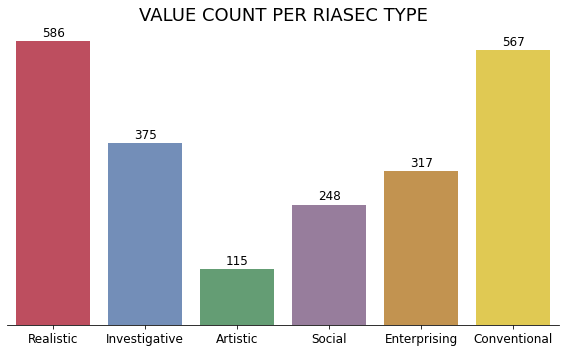

In [13]:
### Show total value for each types result in barplot
# set color palette
colors = ['#CF3B53', '#688BC3', '#5BA670', '#9A78A1', '#D5973D', '#F7D93C']
custom_palette = sns.set_palette(sns.color_palette(colors))

# set plot and make the barplot
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(x = riasec, y = list(riasec_dist.values()), palette = custom_palette)

# manage title and axis
plt.title("VALUE COUNT PER RIASEC TYPE", size = 18)
plt.xticks(size = 12)
ax.set(yticklabels=[])  
ax.tick_params(left=False)

# manage frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# manage value text
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10, y[i], 
                 ha = 'center', size = 12)
addlabels(riasec, list(riasec_dist.values()))

# show plot
plt.tight_layout()
plt.show()

# save chart as png
fig.savefig('RIASEC distribution.png', transparent = True)

**OUTPUT RESULT:**<br>
The distribution is quite imbalance since some type has much values (Realistic: 586 values, Conventional: 567 values).
While others are less than half of them (Artistic: 115 values, Social: 248 values).

### 3.B. JOB FAMILY DATA DISTRIBUTION

In [14]:
### Check value for each job family
job_family = Counter([i for i in riasec_df['Job Family']])
job_family

Counter({'Farming, Fishing, and Forestry': 12,
         'Construction and Extraction': 61,
         'Transportation and Material Moving': 47,
         'Food Preparation and Serving Related': 16,
         'Production': 107,
         'Building and Grounds Cleaning and Maintenance': 8,
         'Personal Care and Service': 29,
         'Protective Service': 24,
         'Arts, Design, Entertainment, Sports, and Media': 38,
         'Installation, Maintenance, and Repair': 50,
         'Office and Administrative Support': 51,
         'Healthcare Support': 19,
         'Architecture and Engineering': 55,
         'Life, Physical, and Social Science': 57,
         'Healthcare Practitioners and Technical': 78,
         'Computer and Mathematical': 29,
         'Educational Instruction and Library': 57,
         'Management': 51,
         'Business and Financial Operations': 43,
         'Legal': 7,
         'Sales and Related': 21,
         'Community and Social Service': 14})

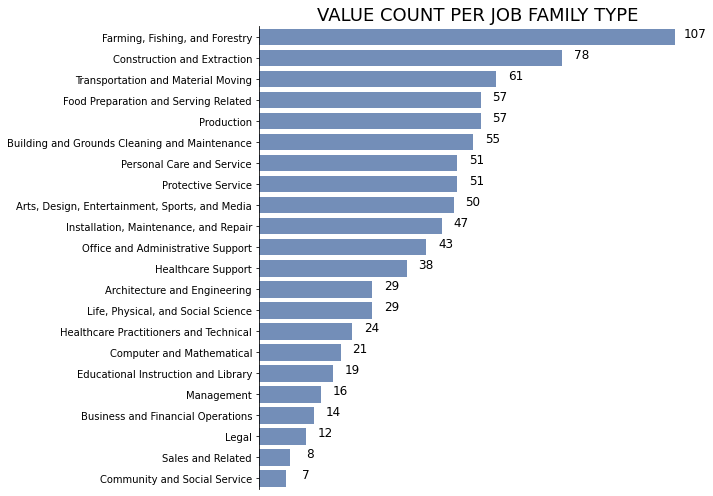

In [15]:
### Show value for each job family result in barplot
# set plot and make the barplot
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = sorted(job_family.values(), reverse = True), y = list(job_family.keys()), color = '#688BC3')

# manage title
plt.title("VALUE COUNT PER JOB FAMILY TYPE", size = 18)
ax.set(xticklabels=[])  
ax.tick_params(bottom=False)

# manage frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# manage value text
def addlabels(x):
    for i, value in enumerate(x):
        plt.text(value+5, i, value, 
                 ha = 'center', size = 12)
addlabels(sorted(list(job_family.values()), reverse=True))

# show plot
plt.tight_layout()
plt.show()

# save chart as png
fig.savefig('Job Family distribution.png', transparent = True)

**OUTPUT RESULT:**<br>
In general, jobs in public sector (such as farming, construction, transportation, building) has more diverse occupation title, so the total input is more, compared with jobs in private sector (such as sales, legal, business, management).

### 3.C. DOMINANT JOB FAMILY PER RIASEC TYPE

In [16]:
### Check dominant job family based on RIASEC type
# recall library and variable
from collections import Counter
riasec = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']

# get five top jobs per riasec interest
def top_five_job(types):
    top_job = []
    for i in riasec_df.index:
        if riasec_df.loc[i, 'First Personality'] == types:
            top_job.append(riasec_df.loc[i, 'Job Family'])
    top_job = Counter(top_job).most_common(5)
    top_job = [value[0] for value in top_job]
    return top_job

# show the result
dominant_job = {}
for types in riasec:
    dominant_job[types] = top_five_job(types)
dominant_job = pd.DataFrame(dominant_job)
dominant_job = dominant_job.style.set_table_styles({'Realistic':[{"selector":"td", "props":[("background-color", "#CF3B53")]}],
                                                    'Investigative':[{"selector":"td", "props":[("background-color", "#688BC3")]}],
                                                    'Artistic':[{"selector":"td", "props":[("background-color", "#5BA670")]}],
                                                    'Social':[{"selector":"td", "props":[("background-color", "#9A78A1")]}],
                                                    'Enterprising':[{"selector":"td", "props":[("background-color", "#D5973D")]}],
                                                    'Conventional':[{"selector":"td", "props":[("background-color", "#F7D93C")]}]})
dominant_job

,Realistic,Investigative,Artistic,Social,Enterprising,Conventional
0,Production,"Life, Physical, and Social Science","Arts, Design, Entertainment, Sports, and Media",Educational Instruction and Library,Management,Office and Administrative Support
1,Construction and Extraction,Healthcare Practitioners and Technical,Personal Care and Service,Healthcare Practitioners and Technical,Business and Financial Operations,Business and Financial Operations
2,"Installation, Maintenance, and Repair",Architecture and Engineering,Architecture and Engineering,Community and Social Service,Sales and Related,Computer and Mathematical
3,Transportation and Material Moving,Computer and Mathematical,Sales and Related,Healthcare Support,Transportation and Material Moving,Healthcare Support
4,Architecture and Engineering,Business and Financial Operations,Food Preparation and Serving Related,Personal Care and Service,Protective Service,Sales and Related


**OUTPUT RESULT:**<br>

Each column represent the top-5 job families that are dominant in particular interest.

**INSIGHT:**<br>
- **Realistic** is mostly related with physical and tools-related jobs
- **Investigative** is mostly related with science and analytical jobs
- **Artistic** is mostly related with art/design jobs
- **Social** is mostly related with community service jobs
- **Enterprising** is mostly related with management, business, sales jobs
- **Conventional** is mostly related with administrative and technical jobs

However, some job-family also have combination of personality; such as Architecture and Engineering, which is the combination of Investigative, Artistic, and Realistic type. Or Business and Financial, which is the combination of Enterprising, Conventional, and Investigative type.

### 3.D. RELATIONSHIP BETWEEN EACH RIASEC

In [17]:
### Check relation between types, to get the reference of closest personality
# recall library and variable
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
riasec = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
colors = ['#CF3B53', '#688BC3', '#5BA670', '#9A78A1', '#D5973D', '#F7D93C']

# create relation list
def relation(types):
    # collect all types related, include self
    all_relations = []
    for i in riasec_df.index:
        if riasec_df.loc[i, 'First Personality'] == types:
            all_relations.append(types)
            if riasec_df.loc[i, 'Second Personality'] in riasec:
                all_relations.append(riasec_df.loc[i, 'Second Personality'])
            if riasec_df.loc[i, 'Third Personality'] in riasec:
                all_relations.append(riasec_df.loc[i, 'Third Personality'])

    # sort result from smallest to largest
    all_relations = Counter(all_relations).most_common()
    return all_relations

# Create DataFrame for all personalities
relation_df = pd.DataFrame(columns = riasec, index = riasec, dtype = int)
for types in riasec:
    for i in relation(types):
        relation_df.loc[types, i[0]] = i[1]
relation_df

,Realistic,Investigative,Artistic,Social,Enterprising,Conventional
Realistic,355.0,140.0,17.0,17.0,43.0,277.0
Investigative,87.0,122.0,15.0,31.0,23.0,51.0
Artistic,14.0,8.0,32.0,6.0,19.0,4.0
Social,43.0,65.0,40.0,128.0,33.0,22.0
Enterprising,41.0,16.0,10.0,43.0,131.0,107.0
Conventional,46.0,24.0,1.0,23.0,68.0,106.0


**How to read above dataset:**<br>
Within 355 input with Realistic as First Personality (355 on Realistic-Realistic), there are :
- 140 Investigative input as their Second or Third Personality, 
- 17 Artistic input as their Second or Third Personality,
- 17 Social input as their Second or Third Personality,
- etc...

Within 128 input with Social as First Personality (128 on Social-Social), there are :
- 43 Realistic input as their Second orThird Personality,
- 65 Investigative input as their Second or Third Personality, 
- 40 Artistic input as their Second or Third Personality,
- etc...

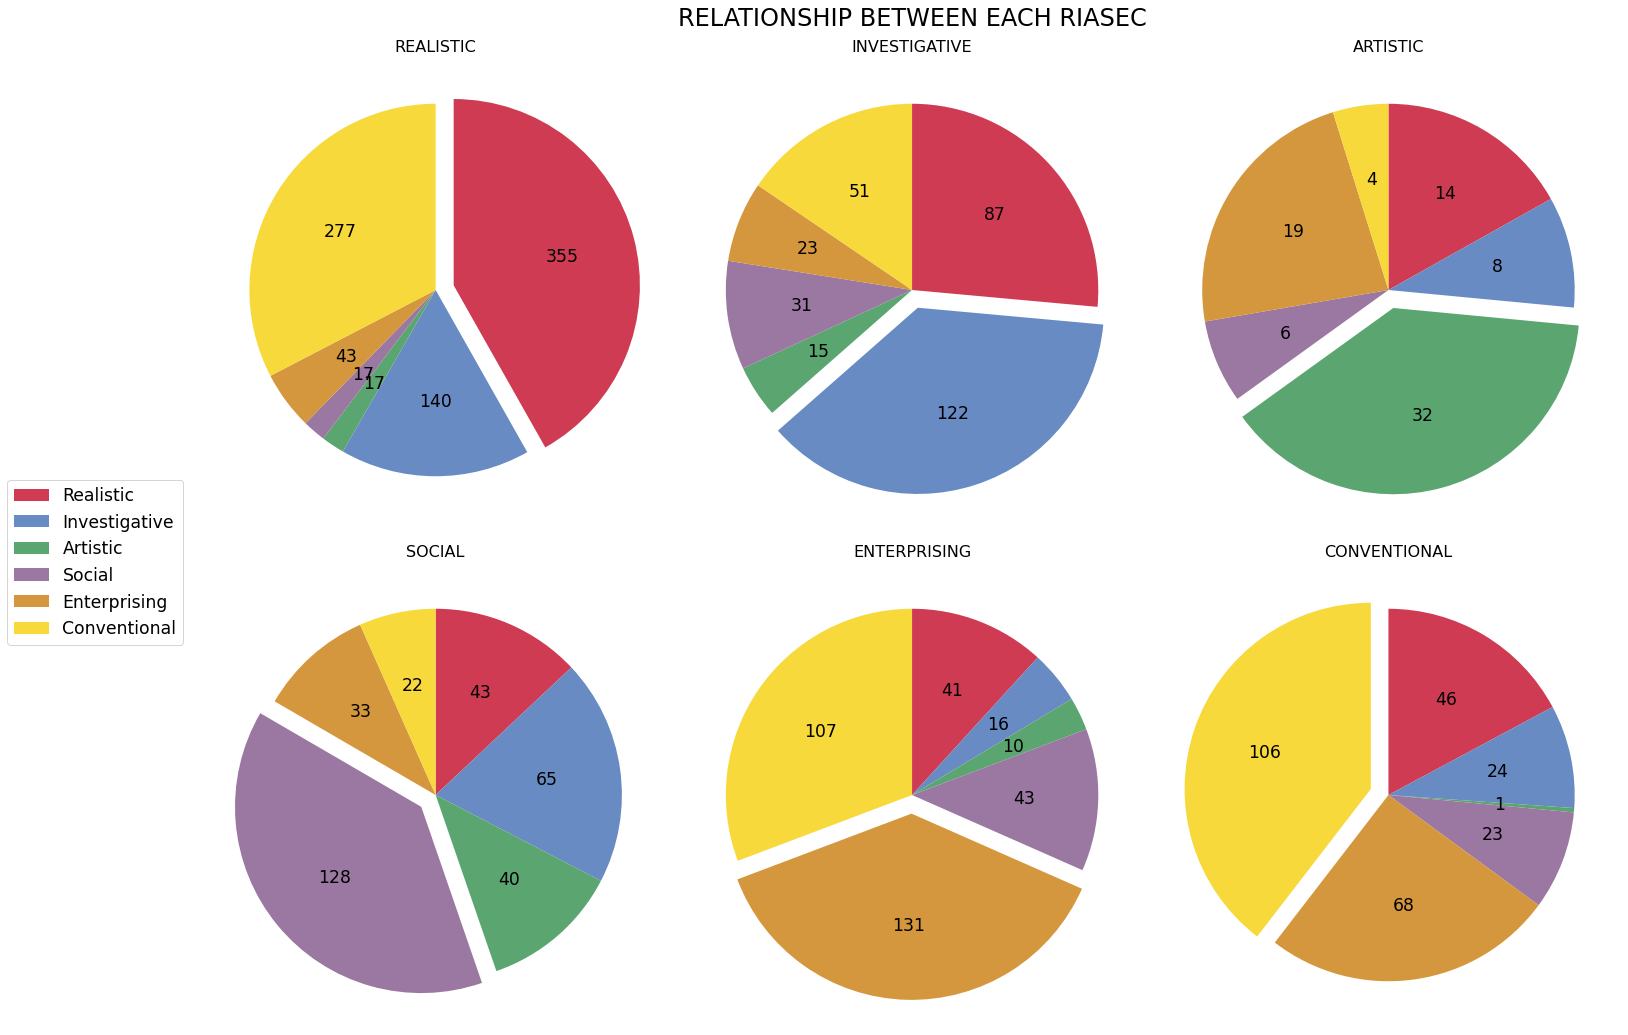

In [18]:
### Create Pie Charts to see the relationship between personalities
# define plot area
fig, axes = plt.subplots(2,3, figsize=(20, 15))
 
# make title    
fig.suptitle('RELATIONSHIP BETWEEN EACH RIASEC', fontsize = 24)

# create function to get total value per row
def total_value(types):
    total = sum(relation_df.loc[types])
    return total

# make pie chart for 'Realistic'
axes[0,0].pie(x=relation_df.loc['Realistic'].to_list(), 
               colors = colors, explode=(0.1, 0, 0, 0, 0, 0),
               startangle = 90, counterclock=False,
               autopct=lambda x: '{:.0f}'.format(x/100*total_value('Realistic')),
               textprops={'size': 'xx-large'})
axes[0,0].set_title(label="REALISTIC", fontsize = 16)

# make pie chart for 'Investigative'
axes[0,1].pie(x=relation_df.loc['Investigative'].to_list(), 
               colors = colors, explode=(0, 0.1, 0, 0, 0, 0),
               startangle = 90, counterclock=False,
               autopct=lambda x: '{:.0f}'.format(x/100*total_value('Investigative')),
               textprops={'size': 'xx-large'})
axes[0,1].set_title(label="INVESTIGATIVE", fontsize = 16)

# make pie chart for 'Artistic'
axes[0,2].pie(x=relation_df.loc['Artistic'].to_list(), 
               colors = colors, explode=(0, 0, 0.1, 0, 0, 0),
               startangle = 90, counterclock=False,
               autopct=lambda x: '{:.0f}'.format(x/100*total_value('Artistic')),
               textprops={'size': 'xx-large'})
axes[0,2].set_title(label="ARTISTIC", fontsize = 16)

# make pie chart for 'Social'
axes[1,0].pie(x=relation_df.loc['Social'].to_list(), 
               colors = colors, explode=(0, 0, 0, 0.1, 0, 0),
               startangle = 90, counterclock=False,
               autopct=lambda x: '{:.0f}'.format(x/100*total_value('Social')),
               textprops={'size': 'xx-large'})
axes[1,0].set_title(label="SOCIAL", fontsize = 16)

# make pie chart for 'Enterprising'
axes[1,1].pie(x=relation_df.loc['Enterprising'].to_list(), 
               colors = colors, explode=(0, 0, 0, 0, 0.1, 0),
               startangle = 90, counterclock=False,
               autopct=lambda x: '{:.0f}'.format(x/100*total_value('Enterprising')),
               textprops={'size': 'xx-large'})
axes[1,1].set_title(label="ENTERPRISING", fontsize = 16)

# make pie chart for 'Conventional'
axes[1,2].pie(x=relation_df.loc['Conventional'].to_list(), 
               colors = colors, explode=(0, 0, 0, 0, 0, 0.1),
               startangle = 90, counterclock=False,
               autopct=lambda x: '{:.0f}'.format(x/100*total_value('Conventional')),
               textprops={'size': 'xx-large'})
axes[1,2].set_title(label="CONVENTIONAL", fontsize = 16)


fig.legend(riasec, bbox_to_anchor=(0,0.55), fontsize= 'xx-large')
plt.tight_layout()
plt.show()

**INSIGHT:** <br>
In theory, dominant personality will have their 'left and right sides' as sub-dominants. While the personality in contrast comes in opposite side.
Let's see from above result:
* People with dominant **Realistic** have **Conventional** (2nd) or **Investigative** (3rd) as their sub-dominant personality.<br> -- This follows theory.
* People with dominant **Investigative** have **Realistic** (2nd) or **Conventional** (3rd) as their sub-dominant personality. <br> -- This is a bit off from theory (s/b Realistic and Artistic), but it may be caused due to discrepancies between Artistic and Conventional value input.
* People with dominant **Artistic** have **Enterprising** (2nd) or **Realistic** (3rd) as their sub-dominant personality. <br> -- This doesn't follow theory (s/b Investigative and Social), but this we can consider because most of artist use tools (Realistic) and depend on themselves when it comes to publish their arts (Enterprising).
* People with dominant **Social** have **Realistic** (2nd) or **Investigative** (3rd) as their sub-dominant personality.<br> -- This doesn't follow theory (s/b Artistic and Enterprising), and it's interesting because Social and Realistic is opposite personality. So this is either due to value input discrepancies, or more Social jobs need more practical and analysis personality.
* People with dominant **Enterprising** have **Conventional** (2nd) or **Social** (3rd) as their sub-dominant personality. <br> -- This follows theory
* People with dominant **Conventional** have **Enterprising** (2nd) or **Realistic** (3rd) as their sub-dominant personality.<br> -- This follows theory

## 4. USER INPUT TEXT ANALYZER

Before we go to modelling process, we will create program to analyze user input.<br>
Here, user can try to input similar like in search engine, for example: `Realistic, Investigative, Health`.<br>
Program will go through some steps to analyze the input, to ensure the keywords can be used for further modelling.

In [19]:
### Import libraries
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from spellchecker import SpellChecker
import copy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Agnes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Agnes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Agnes\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
### Tokenize all words within the dataset
# get all words on dataset as single token
all_text = []
for r in riasec_df.index:
    for c in riasec_df.columns:
        # only input in text type will be tokenized
        if type(riasec_df.loc[r,c]) != "-":
            text = nltk.word_tokenize(riasec_df.loc[r,c])
                        
            # for each tokenized-word list, append each word on all_text list
            for w in text:
                if w not in all_text:
                    all_text.append(w)

# remove non-alphabet character from user input, and set words to lowercase
all_text_ready = []
for wt in all_text:
    wt = re.sub(r'[^a-zA-Z]', '', wt)
    if wt != "":
        all_text_ready.append(wt.lower())

all_text_ready

['realistic',
 'agricultural',
 'equipment',
 'operators',
 'farming',
 'fishing',
 'and',
 'forestry',
 'enterprising',
 'cement',
 'masons',
 'concrete',
 'finishers',
 'construction',
 'extraction',
 'conventional',
 'conveyor',
 'tenders',
 'transportation',
 'material',
 'moving',
 'cooks',
 'fast',
 'food',
 'preparation',
 'serving',
 'related',
 'cutters',
 'trimmers',
 'hand',
 'production',
 'investigative',
 'derrick',
 'oil',
 'gas',
 'social',
 'dining',
 'room',
 'cafeteria',
 'attendants',
 'bartender',
 'helpers',
 'dishwashers',
 'fallers',
 'farmworkers',
 'laborers',
 'crop',
 'nursery',
 'greenhouse',
 'counter',
 'workers',
 'hunting',
 'floor',
 'sanders',
 'graders',
 'sorters',
 'products',
 'grinding',
 'polishing',
 'painters',
 'paperhangers',
 'plasterers',
 'stucco',
 'landscaping',
 'groundskeeping',
 'building',
 'grounds',
 'cleaning',
 'maintenance',
 'laundry',
 'drycleaning',
 'logging',
 'maids',
 'housekeeping',
 'cleaners',
 'meat',
 'poultry',
 'f

**About User Input:**<br>
The program should be able to analyze from interactive user input.<br>
However for programming purpose, we will set the user input by ourselves.

In [21]:
### Have user input for test
user_input = "Realistic, Art1stic, EDUCATION, ChLd"

### User input explanation:
# Word #1 : 'Realistic' is correct format input
# Word #2 : 'Arti5tic' has non-alphabet character within
# Word #3 : 'EDUCATION' has all uppercase input
# Word #4 : 'ChLd' has typo

In [22]:
### Tokenize each word from user input
user_input = nltk.word_tokenize(user_input)
user_input

['Realistic', ',', 'Art1stic', ',', 'EDUCATION', ',', 'ChLd']

In [23]:
### Remove non alphabet from user input, and set words to lowercase
user_input_ready = []
for word in user_input:
    word = re.sub(r'[^a-zA-Z]', '', word)
    if word != "":
        user_input_ready.append(word.lower())
user_input_ready

['realistic', 'artstic', 'education', 'chld']

In [24]:
### Create empty list, to get words that already correct against all_text_ready
final_input = []

### Check the user input, if any word has already correct, put it on final input list
for word in user_input_ready:
    if word in all_text_ready:
        final_input.append(word)
        
final_input

['realistic', 'education']

In [25]:
### Do spell-checker for user input
# create object
spell= SpellChecker()

# check correct spell and add in final input list
for word in user_input_ready:
    candidate = list(spell.candidates(word))
    for c in candidate:
        if c in all_text_ready and c not in final_input:
            final_input.append(c)

final_input

['realistic', 'education', 'artistic', 'child']

In [26]:
### Check words based on their root
# create object
ps = PorterStemmer()
wnl = WordNetLemmatizer()

# create list to combine user input with recent final input
combined_input = user_input_ready + final_input

# create empty list to get all root words from combined input after rooting process
root_word = []

# word stemming & lemmatization check from combined input
for word in combined_input:
    # stemming
    root_word.append(ps.stem(word))
    # lemmatization
    if wnl.lemmatize(word) not in root_word:
        root_word.append(wnl.lemmatize(word))

# check words from all_text that has the same root
for text in all_text_ready:
    for root in root_word:
        if ps.stem(text) == root or wnl.lemmatize(text) == root:
            if text not in final_input:
                final_input.append(text)

final_input

['realistic',
 'education',
 'artistic',
 'child',
 'educational',
 'artists',
 'educators']

## 5. MODELLING 1: TEXT EXTRACTOR

### 5.A. DATA PREPARATION

In [27]:
### Import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
### Replace - with blank string ("")
riasec_df_te = riasec_df.replace(['-'],'')
riasec_df_te

,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,Realistic,,,Agricultural Equipment Operators,"Farming, Fishing, and Forestry"
1,Realistic,Enterprising,,Cement Masons and Concrete Finishers,Construction and Extraction
2,Realistic,Conventional,,Conveyor Operators and Tenders,Transportation and Material Moving
3,Realistic,Conventional,,"Cooks, Fast Food",Food Preparation and Serving Related
4,Realistic,Conventional,,"Cutters and Trimmers, Hand",Production
...,...,...,...,...,...
869,Conventional,Enterprising,Investigative,Web Administrators,Computer and Mathematical
870,Conventional,Investigative,,Archivists,Educational Instruction and Library
871,Conventional,Enterprising,Investigative,Judicial Law Clerks,Legal
872,Conventional,Social,Realistic,Librarians and Media Collections Specialists,Educational Instruction and Library


In [29]:
### change the input to be all lowercase and no character other than alphabet
def extract_string(string):
    new_string = ""
    for i, char in enumerate(string):
        if char.isalpha() == True or char == " " :
            new_string += string[i].lower()
    return new_string

for column in riasec_df_te.columns:
    for row in riasec_df_te.index:
        riasec_df_te.loc[row,column] = extract_string(riasec_df_te.loc[row,column])

riasec_df_te

,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,realistic,,,agricultural equipment operators,farming fishing and forestry
1,realistic,enterprising,,cement masons and concrete finishers,construction and extraction
2,realistic,conventional,,conveyor operators and tenders,transportation and material moving
3,realistic,conventional,,cooks fast food,food preparation and serving related
4,realistic,conventional,,cutters and trimmers hand,production
...,...,...,...,...,...
869,conventional,enterprising,investigative,web administrators,computer and mathematical
870,conventional,investigative,,archivists,educational instruction and library
871,conventional,enterprising,investigative,judicial law clerks,legal
872,conventional,social,realistic,librarians and media collections specialists,educational instruction and library


In [30]:
### Create combined_features as combination of all string components
def combined_features(row):
    combined_column = []
    for i in riasec_df_te.columns:
        combined_column.append(riasec_df_te.loc[row,i])
    return " ".join(combined_column)

riasec_df_te['combined_features'] = [combined_features(i) for i in riasec_df_te.index]
riasec_df_te

,First Personality,Second Personality,Third Personality,Occupation,Job Family,combined_features
0,realistic,,,agricultural equipment operators,farming fishing and forestry,realistic agricultural equipment operators f...
1,realistic,enterprising,,cement masons and concrete finishers,construction and extraction,realistic enterprising cement masons and conc...
2,realistic,conventional,,conveyor operators and tenders,transportation and material moving,realistic conventional conveyor operators and...
3,realistic,conventional,,cooks fast food,food preparation and serving related,realistic conventional cooks fast food food p...
4,realistic,conventional,,cutters and trimmers hand,production,realistic conventional cutters and trimmers h...
...,...,...,...,...,...,...
869,conventional,enterprising,investigative,web administrators,computer and mathematical,conventional enterprising investigative web ad...
870,conventional,investigative,,archivists,educational instruction and library,conventional investigative archivists educati...
871,conventional,enterprising,investigative,judicial law clerks,legal,conventional enterprising investigative judici...
872,conventional,social,realistic,librarians and media collections specialists,educational instruction and library,conventional social realistic librarians and m...


In [31]:
### Define function to get the anchor row: first row occurence that is most matching with keywords
def get_index_from_keyword(keyword):
    word_match =[0,0] # first place will be the index, second place will be the count
    for i in riasec_df_te.index:
        count = 0
        for word in keyword:
            if word.lower() in riasec_df_te.loc[i, 'combined_features']:
                count +=1
        # program will find the highest count or row with most keyword-match amount, but only take the first occurence
        if count > word_match[1]:
            word_match[0], word_match[1] = i, count
    return word_match[0]

### Define function to get dataframe row from index
def get_row_from_index(index):
    return riasec_df.loc[index]

### 5.B. MODELLING BY CountVectorizer

In [32]:
### Get the user input
# For this program, we will use the final input from previous steps
final_input

['realistic',
 'education',
 'artistic',
 'child',
 'educational',
 'artists',
 'educators']

In [33]:
# Create table to display the anchor row based on keywords
print("KEYWORDS MOSTLY MATCH WITH THIS OCCUPATION:")
match_row = pd.DataFrame(get_row_from_index(get_index_from_keyword(final_input))).T
match_row

KEYWORDS MOSTLY MATCH WITH THIS OCCUPATION:


,First Personality,Second Personality,Third Personality,Occupation,Job Family
340,Realistic,Artistic,-,Museum Technicians and Conservators,Educational Instruction and Library


In [34]:
### Create the model to whole dataset
cv = CountVectorizer()
cv_matrix = cv.fit_transform(riasec_df_te["combined_features"])
cv_cosine_sim = cosine_similarity(cv_matrix)

In [35]:
### Apply modelling to user input Using CountVectorizer Modelling
# Check cosine similarity value between keyword and all rows --> convert into list-of-tuple type
cv_rec_job = list(enumerate(cv_cosine_sim[get_index_from_keyword(final_input)]))

# Sort cosine similarity value from the highest
sorted_cv_rec_job = sorted(cv_rec_job, key = lambda x: x[1], reverse=True)

# take top-ten similar result
top_ten_cv = sorted_cv_rec_job[:10]

# show the result
cv_result = pd.DataFrame(columns = riasec_df.columns)
for i, value in enumerate(top_ten_cv):
    cv_result.loc[i] = riasec_df.iloc[value[0], :]

print("BELOW ARE SIMILAR OCCUPATIONS - BASED ON COUNT VECTORIZER MODELLING:")
cv_result

BELOW ARE SIMILAR OCCUPATIONS - BASED ON COUNT VECTORIZER MODELLING:


,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,Realistic,Artistic,-,Museum Technicians and Conservators,Educational Instruction and Library
1,Social,Artistic,-,"Art, Drama, and Music Teachers, Postsecondary",Educational Instruction and Library
2,Social,Artistic,Investigative,"Philosophy and Religion Teachers, Postsecondary",Educational Instruction and Library
3,Social,Realistic,Enterprising,Farm and Home Management Educators,Educational Instruction and Library
4,Conventional,Social,Realistic,Librarians and Media Collections Specialists,Educational Instruction and Library
5,Conventional,Social,Enterprising,Library Technicians,Educational Instruction and Library
6,Social,Artistic,Investigative,"English Language and Literature Teachers, Post...",Educational Instruction and Library
7,Social,Artistic,Investigative,"Foreign Language and Literature Teachers, Post...",Educational Instruction and Library
8,Social,Investigative,Artistic,"Family and Consumer Sciences Teachers, Postsec...",Educational Instruction and Library
9,Social,Investigative,Realistic,"Forestry and Conservation Science Teachers, Po...",Educational Instruction and Library


### 5.C. MODELLING BY TfidfVectorizer

In [36]:
### Create the model to whole dataframe
tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(riasec_df_te["combined_features"])
tv_cosine_sim = cosine_similarity(tv_matrix)

In [37]:
### Apply modelling to user input : Using TfidfVectorizer Modelling
# Check cosine similarity value between keyword and all rows --> convert into list-of-tuple type
tv_rec_job = list(enumerate(tv_cosine_sim[get_index_from_keyword(final_input)]))

# Sort cosine similarity value from the highest
sorted_tv_rec_job = sorted(tv_rec_job, key = lambda x: x[1], reverse=True)

# take top-ten similar result
top_ten_tv = sorted_cv_rec_job[:10]

# show the result
tv_result = pd.DataFrame(columns = riasec_df.columns)
for i, value in enumerate(top_ten_tv):
    tv_result.loc[i] = riasec_df.iloc[value[0], :]

print("BELOW ARE SIMILAR OCCUPATIONS - BASED ON TFIDF VECTORIZER MODELLING:")
tv_result

BELOW ARE SIMILAR OCCUPATIONS - BASED ON TFIDF VECTORIZER MODELLING:


,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,Realistic,Artistic,-,Museum Technicians and Conservators,Educational Instruction and Library
1,Social,Artistic,-,"Art, Drama, and Music Teachers, Postsecondary",Educational Instruction and Library
2,Social,Artistic,Investigative,"Philosophy and Religion Teachers, Postsecondary",Educational Instruction and Library
3,Social,Realistic,Enterprising,Farm and Home Management Educators,Educational Instruction and Library
4,Conventional,Social,Realistic,Librarians and Media Collections Specialists,Educational Instruction and Library
5,Conventional,Social,Enterprising,Library Technicians,Educational Instruction and Library
6,Social,Artistic,Investigative,"English Language and Literature Teachers, Post...",Educational Instruction and Library
7,Social,Artistic,Investigative,"Foreign Language and Literature Teachers, Post...",Educational Instruction and Library
8,Social,Investigative,Artistic,"Family and Consumer Sciences Teachers, Postsec...",Educational Instruction and Library
9,Social,Investigative,Realistic,"Forestry and Conservation Science Teachers, Po...",Educational Instruction and Library


## 6. MODELLING 2: K-NEAREST NEIGHBORS

### 6.A. DATA PREPARATION

In [38]:
### Import libraries
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import NearestNeighbors

In [39]:
### Create one-hot-encoding for RIASEC type
# recall variable
riasec = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']

# one-hot-encoding manually
ohc_riasec = pd.DataFrame()
for i in riasec_df.index:
    for value in riasec:
        for interest in range(3):
            if riasec_df.iloc[i,interest] == value:
                ohc_riasec.at[i,value]= 1
                
ohc_riasec = ohc_riasec.fillna(0)
ohc_riasec

,Realistic,Enterprising,Conventional,Investigative,Social,Artistic
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
869,0.0,1.0,1.0,1.0,0.0,0.0
870,0.0,0.0,1.0,1.0,0.0,0.0
871,0.0,1.0,1.0,1.0,0.0,0.0
872,1.0,0.0,1.0,0.0,1.0,0.0


In [40]:
### Create one-hot-encoding for job family using Label Binarizer
ohc_job_family = LabelBinarizer().fit_transform(riasec_df['Job Family'])
ohc_job_family = pd.DataFrame(ohc_job_family, columns = sorted(riasec_df['Job Family'].unique()))
ohc_job_family

,Architecture and Engineering,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,Educational Instruction and Library,"Farming, Fishing, and Forestry",Food Preparation and Serving Related,...,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Protective Service,Sales and Related,Transportation and Material Moving
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
870,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
871,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
872,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
### Combine ohc_riasec and ohc_job_family into one dataframe
riasec_df_3 = ohc_riasec.join(ohc_job_family)
riasec_df_3

,Realistic,Enterprising,Conventional,Investigative,Social,Artistic,Architecture and Engineering,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,...,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Protective Service,Sales and Related,Transportation and Material Moving
0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
870,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
871,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
872,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
### Transform datas in array form so can be read by KNN modelling
# create two-dimentional array for whole dataset
riasec_df_array = []
for i in riasec_df_3.index:
    riasec_df_array.append(list(riasec_df_3.loc[i]))    
riasec_df_array = np.array(riasec_df_array)
riasec_df_array

# create two-dimentional array for keyword
knn_array = np.array(riasec_df_3.loc[get_index_from_keyword(final_input)]).reshape(1, -1)

### 6.B. KNN MODELLING

In [43]:
### Apply modelling to user input : Using KNN Modelling
knn_riasec = NearestNeighbors(n_neighbors = 10, metric = 'cosine').fit(riasec_df_array)
distance, indices = knn_riasec.kneighbors(knn_array, n_neighbors = 10) 

# take top-ten similar result
top_ten_knn = indices.tolist()[0][:]

# show the result
knn_result = pd.DataFrame(columns = riasec_df.columns)
for i, value in enumerate(top_ten_knn):
    knn_result.loc[i] = riasec_df.iloc[value, :]

print("BELOW ARE SIMILAR OCCUPATIONS - BASED ON KNN MODELLING:")
knn_result

BELOW ARE SIMILAR OCCUPATIONS - BASED ON KNN MODELLING:


,First Personality,Second Personality,Third Personality,Occupation,Job Family
0,Realistic,Artistic,-,Museum Technicians and Conservators,Educational Instruction and Library
1,Artistic,Realistic,-,"Makeup Artists, Theatrical and Performance",Personal Care and Service
2,Realistic,Artistic,-,"Potters, Manufacturing",Production
3,Artistic,Realistic,-,Photographers,"Arts, Design, Entertainment, Sports, and Media"
4,Social,Artistic,-,"Art, Drama, and Music Teachers, Postsecondary",Educational Instruction and Library
5,Realistic,Artistic,-,Sound Engineering Technicians,"Arts, Design, Entertainment, Sports, and Media"
6,Social,Artistic,-,"Kindergarten Teachers, Except Special Education",Educational Instruction and Library
7,Realistic,Artistic,-,"Stone Cutters and Carvers, Manufacturing",Production
8,Social,Realistic,-,"Career/Technical Education Teachers, Postsecon...",Educational Instruction and Library
9,Social,Artistic,-,"Special Education Teachers, Middle School",Educational Instruction and Library


## 7. FINAL WORDS

**MODEL INTERPRETATION**<br>
Eventhough each model has different output, in general all modelling approach will generate similar recommendation against the keywords

**CONSTRAINS**
* Dataset is limited -- many recent jobs may not be included in the data yet.
* Dataset is imbalance -- one personality/job family is much more than another.
* Text Analyzer for user input still has limited process. If the input has too much typo, program may not detect properly.

**FUTURE DEVELOPMENT FOR BUSINESS RECOMMENDATION**
1. Job recommendation engine based on personality can be very useful for people, to find the balance between their personality and their interest or personality.
2. Recommendation result can be linked with the job application sites, so it does not only show the occupation title, but also can give future employee some options of related applications.
3. From employer side, it will also be useful to see whether the employee personality will match to the job or not.